In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Reading the dataset 

data = pd.read_csv('C:\\Users\\saraa\\Downloads\\ratings.csv')
data.head()
data.info()

## convert to pandas Data Frame

data = pd.DataFrame(data=data)

In [ ]:
data['User continent'].value_counts()

North America    232
Europe           100
Oceania           34
Asia              29
Africa             7
South America      6
Name: User continent, dtype: int64

## Data Visualization and Understanding

 Check Null values

Text(0.5, 1, 'Number of Missing Values')

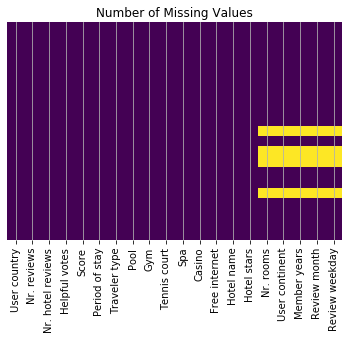

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")

A look on overall rating in Las Vegas

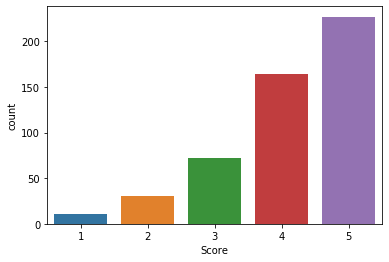

In [ ]:
sns.countplot(x='Score',data=data)

A question relating score is about hotel star. 
Does a hotel with a higher star impress uesr more than a hotel with a lower star?


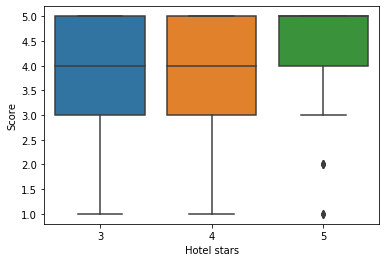

In [ ]:
sns.boxplot(x='Hotel stars',y='Score',data=data)

Probably because all hotels are in Vegas, even hotels with lower hotel stars still provide good services to customers. Average score for each hotel star category is over 4. So there is no difference between hotels with higher stars and with lower stars

Another possible point of view is regarding to facilities. In dataset, there are six variables about facilities, Pool,Gym,Tennis court ,Spa,Casino and Free internet. Let's have a look on whether providing these facilities can boost users' satisfaction.

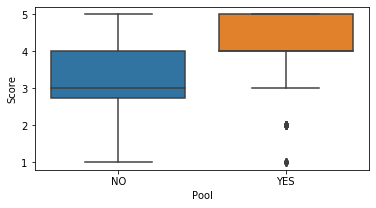

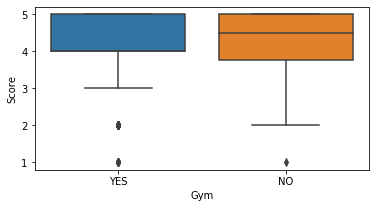

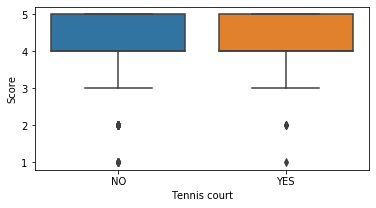

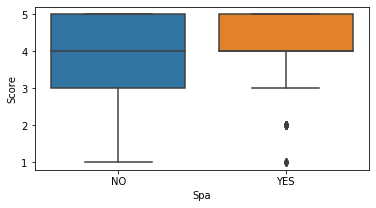

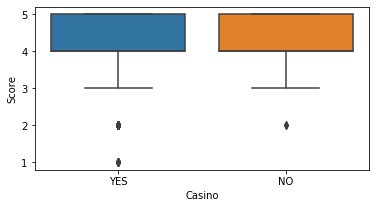

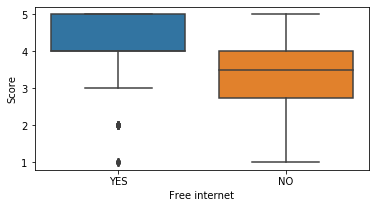

In [ ]:
facilities_list=['Pool','Gym','Tennis court','Spa','Casino','Free internet']
for i in facilities_list:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=i,y='Score',data=data)
    plt.show()

There is a decrease on score for hotel without pool and free internet (why would people stay in hotels without free Wi-Fi?)

Dataset also contains users' purpose of staying. We can also see if there is any correlation with their rating

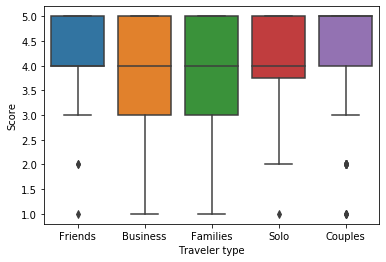

In [ ]:
sns.boxplot(x='Traveler type',y='Score',data=data)

We cannot notice any significant variance with different types of travellers.

## Data Preprocessing

Mapping seasons in place of months 

In [ ]:
## Mapping seasons in place of months 

['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
data['Period of stay'] = data['Period of stay'].map(
    {'Dec-Feb':'winter', 'Mar-May':'spring', 
     'Jun-Aug' :'summer','Sep-Nov':'autumn'})


Filling missing values

In [ ]:
## Filling Missing Values 

data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))

Scaling  numerical columns

In [ ]:
## Scaling only numerical columns

from sklearn.preprocessing import MinMaxScaler
columns_to_scale  = ['Nr. reviews', 'Nr. hotel reviews','Helpful votes','Hotel stars','Nr. rooms','Member years']

scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,0.012920,0.015209,0.035616,5,winter,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,0.0,0.931573,North America,0.997801,January,Thursday
1,USA,0.152455,0.079848,0.205479,3,winter,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,0.0,0.931573,North America,0.994502,January,Friday
2,USA,0.045220,0.034221,0.068493,5,spring,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,0.0,0.931573,North America,0.993953,February,Saturday
3,UK,0.016796,0.026616,0.038356,4,spring,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,0.0,0.931573,Europe,0.996152,February,Friday
4,Canada,0.005168,0.019011,0.005479,4,spring,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,0.0,0.931573,North America,0.996701,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,0.018088,0.015209,0.021918,5,autumn,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,0.5,0.137662,Europe,0.993403,October,Sunday
500,Canada,0.063307,0.049430,0.079452,4,autumn,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,0.5,0.137662,North America,0.997251,November,Thursday
501,USA,0.197674,0.087452,0.084932,4,autumn,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,0.5,0.137662,North America,0.995052,November,Thursday
502,USA,0.010336,0.022814,0.013699,2,winter,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,0.5,0.137662,North America,0.997801,December,Wednesday


 Converting categorical features to  one hot encoding

In [ ]:
## Encoding categorical features with one hot encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

onehotencoder = OneHotEncoder()
enc = OneHotEncoder(handle_unknown='ignore')
data = pd.get_dummies(data, columns=['Period of stay', 'User country','Traveler type', 'Pool','Gym','Tennis court','Spa','Casino','Free internet','Hotel name','User continent','Review month','Review weekday'], drop_first=True)

data.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,Period of stay_spring,Period of stay_summer,Period of stay_winter,...,Review month_May,Review month_November,Review month_October,Review month_September,Review weekday_Monday,Review weekday_Saturday,Review weekday_Sunday,Review weekday_Thursday,Review weekday_Tuesday,Review weekday_Wednesday
0,0.012920,0.015209,0.035616,5,0.0,0.931573,0.997801,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.152455,0.079848,0.205479,3,0.0,0.931573,0.994502,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.045220,0.034221,0.068493,5,0.0,0.931573,0.993953,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.016796,0.026616,0.038356,4,0.0,0.931573,0.996152,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.005168,0.019011,0.005479,4,0.0,0.931573,0.996701,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Prepair train and test sets


In [ ]:
## prepare train and test sets

from sklearn.model_selection import train_test_split

X = data.drop(['Score'], axis=1) ## remove score label from data
y = data['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Models Training

In [ ]:
##Train Random Forest Model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scores_train = []
scores_test = []

clf = RandomForestClassifier(n_estimators =100, max_depth=10, min_samples_leaf=2)
clf.fit(X_train, y_train)

# Predict the response for test dataset
scores_train.append(clf.score(X_train,y_train))
scores_test.append(logisitic_regression.score(X_test,y_test))


y_pred = clf.predict(X_test)

print("Average Accuracy on trainset:", round(np.mean(scores_train),2))
print('Average Accuracy on Test Data: ',round(np.mean(scores_test),2))

print("Accuracy:", round(accuracy_score(y_test, y_pred),2))


Average Accuracy on trainset: 0.74
Average Accuracy on Test Data:  0.45
Accuracy: 0.53


In [ ]:
## Train Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

scores_train = []
scores_test = []

DT = DecisionTreeClassifier(criterion="entropy", max_depth=10)
DT = DT.fit(X_train, y_train)

# Predict the response for test dataset
scores_train.append(DT.score(X_train,y_train))
scores_test.append(DT.score(X_test,y_test))

# Predict the response for test dataset

y_pred = DT.predict(X_test)


print("Average Accuracy on trainset:", round(np.mean(scores_train),2))
print('Average Accuracy on Test Data: ',round(np.mean(scores_test),2))

print("Accuracy:", round(accuracy_score(y_test, y_pred),2))

Average Accuracy on trainset: 0.83
Average Accuracy on Test Data:  0.43
Accuracy: 0.43


In [ ]:
## Train SVC Model 

from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import accuracy_score

scores_train = []
scores_test = []

svc = svm.SVC(kernel = 'rbf', gamma = 1000, C = 100)
svc.fit(X_train, y_train)


scores_train.append(svc.score(X_train,y_train))
scores_test.append(svc.score(X_test,y_test))

# Predict the response for test dataset

print("Average Accuracy on trainset:", round(np.mean(scores_train),2))
print('Average Accuracy on Test Data: ',round(np.mean(scores_test),2))
y_pred = svc.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred),2))

Average Accuracy on trainset: 1.0
Average Accuracy on Test Data:  0.47
Accuracy: 0.47


In [ ]:
#### Train KNN Classifer

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

scores_train = []
scores_test = []

knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn.fit(X_train, y_train)

scores_train.append(knn.score(X_train,y_train))
scores_test.append(knn.score(X_test,y_test))

# Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Average Accuracy on trainset:", round(np.mean(scores_train),4))
print('Average Accuracy on Test Data: ',round(np.mean(scores_test),4))

print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))


Average Accuracy on trainset: 0.5938
Average Accuracy on Test Data:  0.451
Accuracy: 0.45


In [ ]:
import sys
!{sys.executable} -m pip install xgboost

You should consider upgrading via the 'C:\Users\saraa\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
## Train XGboost Model

import xgboost as xgb
from sklearn.metrics import accuracy_score

scores_train = []
scores_test = []


xg = xgb.XGBClassifier(booster = 'gbtree', max_depth = 6, n_estimators=100)
xg.fit(X_train, y_train)

scores_train.append(xg.score(X_train,y_train))
scores_test.append(xg.score(X_test,y_test))

# Predict the response for test dataset

print("Average Accuracy on trainset:", round(np.mean(scores_train),2))
print('Average Accuracy on Test Data: ',round(np.mean(scores_test),2))

y_pred = xg.predict(X_test)
print("Accuracy:", round( metrics.accuracy_score(y_test, y_pred),2))

Average Accuracy on trainset: 1.0
Average Accuracy on Test Data:  0.53
Accuracy: 0.53


In [ ]:
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', svm.SVC()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('Logistic Regression', LogisticRegression()))
models.append(('xgboost',  xgb.XGBClassifier()))

In [ ]:
# evaluate each model in turn Mean accuracy  & standard deviation accuracy
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
print('Model         Mean accuracy     (Accuracy std)')
for name, model in models:
    kfold = model_selection.KFold(n_splits=2, random_state=None)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)

    names.append(name)
    msg = "%s:            %f         (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Model         Mean accuracy     (Accuracy std)
RF:            0.398810         (0.033730)
DT:            0.400794         (0.003968)
SVC:            0.450397         (0.041667)
KNN:            0.386905         (0.029762)


C:\Users\saraa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saraa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saraa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\saraa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

xgboost:            0.375000         (0.005952)


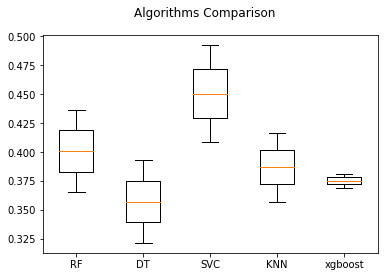

In [ ]:

fig = plt.figure()
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=12) #12-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

In [ ]:
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Score 1', c='lightblue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Score 2', c='green')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Score 3', c='lightgreen')
plt.scatter(transformed[y==4][0], transformed[y==4][1], label='Score 4', c='red')
plt.scatter(transformed[y==5][0], transformed[y==5][1], label='Score 5', c='blue')


plt.legend()
plt.show()